DATA PENELITIAN RADON-THORON PADA SAAT MAGANG DI BRIN.

SEMANGAT CUYY....!!

In [158]:
import seaborn as sns
sns.set_theme(style="darkgrid")

import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import numpy as np



First, we input the csv data.

In [159]:
# Load the Excel file into a DataFrame
df = pd.read_csv('data3.csv')
df

,Code,Time,Radon (Bq/m3),Unnamed: 3,Thoron (Bq/m3),Unnamed: 5,Temperatur (OC),RH
0,3101,9.17,7.89,38.1,0.0,63.2,28.0,54
1,3102,9.37,31.70,51.2,0.0,63.3,28.6,53
2,3103,9.57,31.70,51.2,15.8,76.4,28.6,51
3,3104,10.18,31.70,51.2,0.0,63.3,28.6,53
4,3105,10.38,39.60,54.6,0.0,63.3,29.2,55
5,3106,10.58,15.80,43.3,0.0,63.3,29.5,54
6,3107,11.18,0.00,31.7,0.0,63.3,29.8,49
7,3108,11.38,23.70,47.5,15.8,76.4,29.5,50
8,3109,11.58,23.70,47.5,0.0,63.3,29.2,49
9,3110,12.18,39.70,54.8,0.0,63.5,28.9,49


Then, we look into general information of the data.

In [160]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Code             10 non-null     int64  
 1   Time             10 non-null     float64
 2   Radon (Bq/m3)    10 non-null     float64
 3   Unnamed: 3       10 non-null     float64
 4   Thoron (Bq/m3)   10 non-null     float64
 5   Unnamed: 5       10 non-null     float64
 6   Temperatur (OC)  10 non-null     float64
 7   RH               10 non-null     int64  
dtypes: float64(6), int64(2)
memory usage: 772.0 bytes


We rename the unnamed 3 and 5 into std radon and std thoron in to make it sense.

In [161]:

df.rename(columns={'Unnamed: 3': 'Std Radon'}, inplace=True)
df.rename(columns={'Unnamed: 5': 'Std Thoron'}, inplace=True)

We check the name again.

In [167]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Time             10 non-null     float64
 1   Radon (Bq/m3)    10 non-null     float64
 2   Thoron (Bq/m3)   10 non-null     float64
 3   Temperatur (OC)  10 non-null     float64
 4   RH               10 non-null     int64  
dtypes: float64(4), int64(1)
memory usage: 532.0 bytes


We make the view as value of 'Radon (Bq/m3)', 'Thoron (Bq/m3)','Temperatur (OC)', and 'RH' change over time.

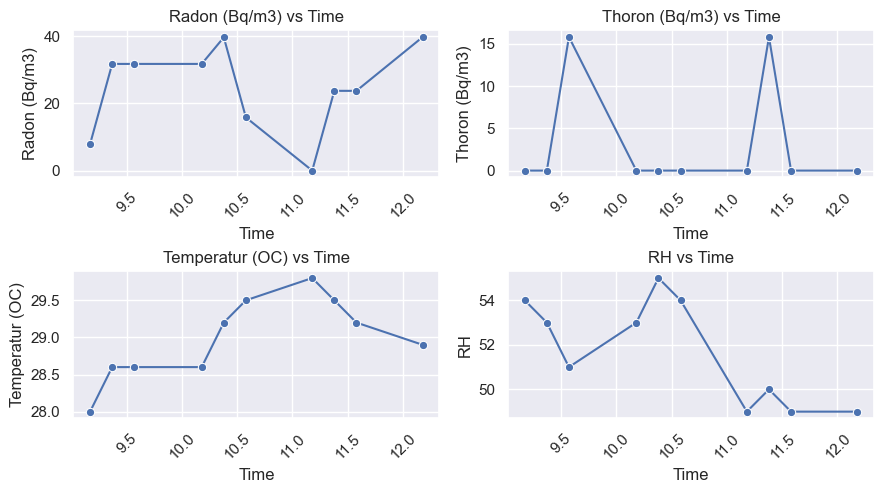

In [163]:
# Create bar plots for each variable against Time
variables = ['Radon (Bq/m3)', 'Thoron (Bq/m3)','Temperatur (OC)', 'RH']

# Define subplot layout
n_rows = 2
n_cols = 2
fig, axes = plt.subplots(n_rows, n_cols, figsize=(9, 5))
axes = axes.flatten()  # Flatten to 1D array for easy indexing

for i, var in enumerate(variables):
    sns.lineplot(x='Time', y=var, data=df, ax=axes[i], marker='o')

    axes[i].set_title(f'{var} vs Time')
    axes[i].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

It seems no relation for each variables. To ensure that we can do the pairplot between them.

But there are variables that doesn't likely to get our attention. It better to erase them. Now we erase std radon, std thoron, and code.

In [164]:
df.drop(columns=['Std Radon', 'Std Thoron', 'Code'], inplace=True)

df

,Time,Radon (Bq/m3),Thoron (Bq/m3),Temperatur (OC),RH
0,9.17,7.89,0.0,28.0,54
1,9.37,31.70,0.0,28.6,53
2,9.57,31.70,15.8,28.6,51
3,10.18,31.70,0.0,28.6,53
4,10.38,39.60,0.0,29.2,55
5,10.58,15.80,0.0,29.5,54
6,11.18,0.00,0.0,29.8,49
7,11.38,23.70,15.8,29.5,50
8,11.58,23.70,0.0,29.2,49
9,12.18,39.70,0.0,28.9,49


Then we look at each variables correlation using heatmap.

<Axes: >

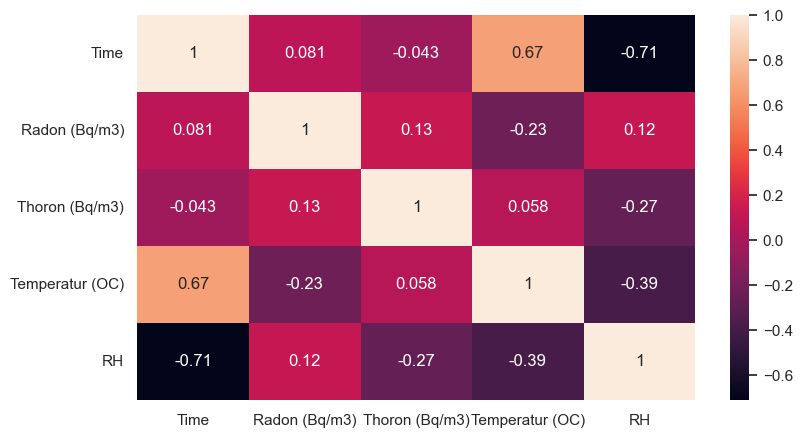

In [165]:
plt.figure(figsize=(9,5))
sns.heatmap(df.corr(), annot=True)

Okay, as we see on the map. There is almost no significant correlation except between temperature vs time (0.67). So sad ;)

We can conclude that no correlation between the variables and because of that we finish the analysis here. Thank you for your attention. This is my first data analysis code since a half year ago, so ganbatte..!!!